# Natural resource modelling

Humans use natural resources. Despite of the apparent simplicity of the process, the dynamics of natural resources can be very complex. Here, we build on the logistic growth equation (see a prior notebook), and apply it to a fishing case study, where $N$ is the amount of fish in the sea. The fish population will follow logistic growth when not exploited. We presume that because of a certain fishing effort, there is a specific chance for any fish to be caught, imposing a certain loss rate $cN$ on the population.


$$
\begin{aligned}
\frac{dN}{dt} & = r\big(1 - \frac{N}{K}\big)N - cN\\
\end{aligned}
$$

Here $r$ is the intrinsic growth rate of the resource population, and $K$ is the carrying capacity. 

A good book on natural resource dynamics is:  
*Clark, C.W., 2010. Mathematical bioeconomics: the mathematics of conservation (Vol. 91). John Wiley & Sons.*

Below, we implement this model in Python.

### Import of important packages

In [3]:
import numpy as np
from matplotlib import pyplot as plt

### Model parameters are defined here

In [4]:
K = 100.0   # 100  - The carrying capacity
r = 0.2     # 0.2  - The intrinsic growth rate
c = 0.03    # 0.03 - A consumption factor 

Here, we derive the curves determining the relation between population density, population growth, and consumption.

In [5]:
Ni = np.linspace(0,K+10)  # A series of values of N
Growth = r*(1-Ni/K)*Ni    # The growth at each value of N
Consumption = c*Ni        # The consumption at each value of N

### Simulation settings

In [53]:
EndTime = 100   # The simulation solves for this amount of time
dT = 1          # The time step taken for each iteration

The total number of iterations that the simulation has to do is determined by the required duration divided by the timestep. The int() function makes sure that the outcome is an discrete number.

In [54]:
Iterations = int(EndTime/dT)  # The number of iterations the simulation needs

We define a function that calculates what the rate of change is for the population at a specific timestep as a function of its population size.

In [55]:
def dN(N):    # Differential equation as a function
    return r*(1.0-N/K)*N - c*N  

Now we can run the simulation, calculating the value for each next time step as a function of the value of the previous one.

In [56]:
N=np.zeros(Iterations+1)    # a 1D array of values, one for each time step
N[0]=1                      # Starting value 
for i in range(Iterations):     # Computation loop
    N[i+1] = N[i] + dT*dN(N[i]) # Update of N each timestep

After the simulation is finished, we can plot the results

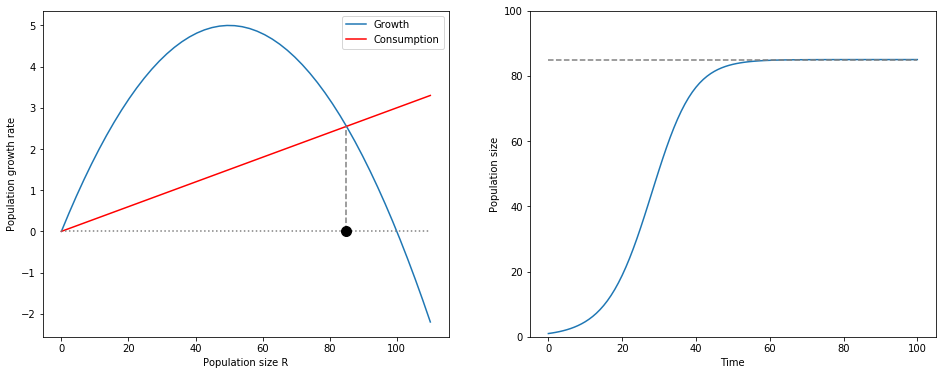

In [70]:
# Setting up the plot
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# The growth & consumption plot
ax[0].plot(Ni,Growth)             # Growth curve
ax[0].plot(Ni,Consumption, 'r-')  # Consumption
ax[0].plot( (0,K+10),(0,0), ':', color='gray') # zero line
ax[0].plot( ((1-c/r)*K,(1-c/r)*K), (0,(1-c/r)*K*c) , 
            '--', color='gray')   # Vertical line to intersection
ax[0].plot( (1-c/r)*K,0 , 'ko', markersize=10) # Equilibrium marker
ax[0].legend(('Growth','Consumption'))      # Legend
ax[0].set_xlabel('Population size R')       # X label
Null=ax[0].set_ylabel('Population growth rate')    # Y label 

# Population size versus time plot
ax[1].plot(np.linspace(0,EndTime,len(N)),N) # Population curve
ax[1].plot( (0,K),((1-c/r)*K,(1-c/r)*K),
            '--', color='gray')             # Gray equilibrium line 
ax[1].set_xlabel('Time')                    # X label
ax[1].set_ylabel('Population size')         # Y label
Null=ax[1].set_ylim(0,K)                    # Setting Y axis limits

© Johan van de Koppel, NIOZ-Yerseke 2018